In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [3]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [4]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [11]:
df.sample(5)

,Age,EstimatedSalary,Purchased
369,54,26000,1
364,42,104000,1
58,22,18000,0
222,37,144000,1
215,60,108000,1


## Standardization

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [19]:
# Experiment
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [20]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Visualization

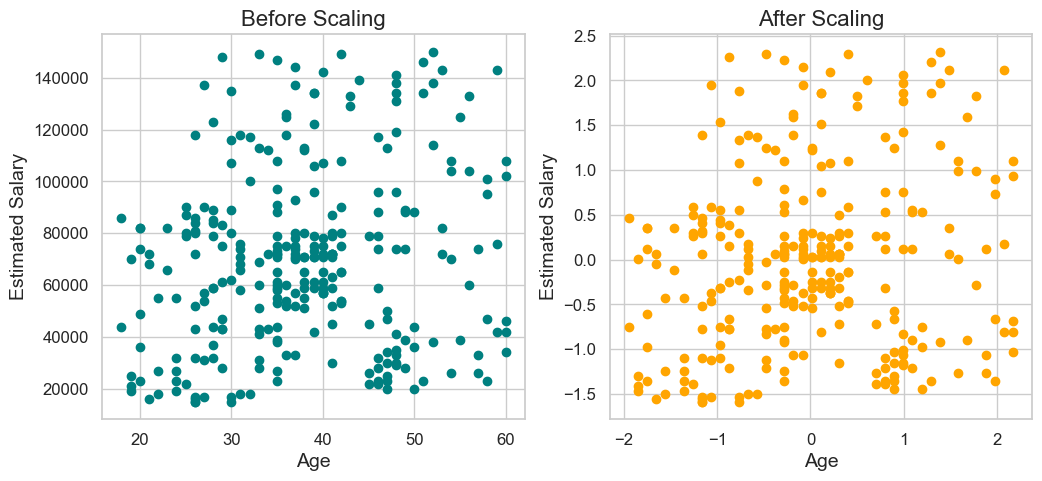

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot before scaling with a different color
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color='teal')
ax1.set_title('Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

# Plot after scaling with a different color
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='orange')
ax2.set_title('After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')

plt.show()

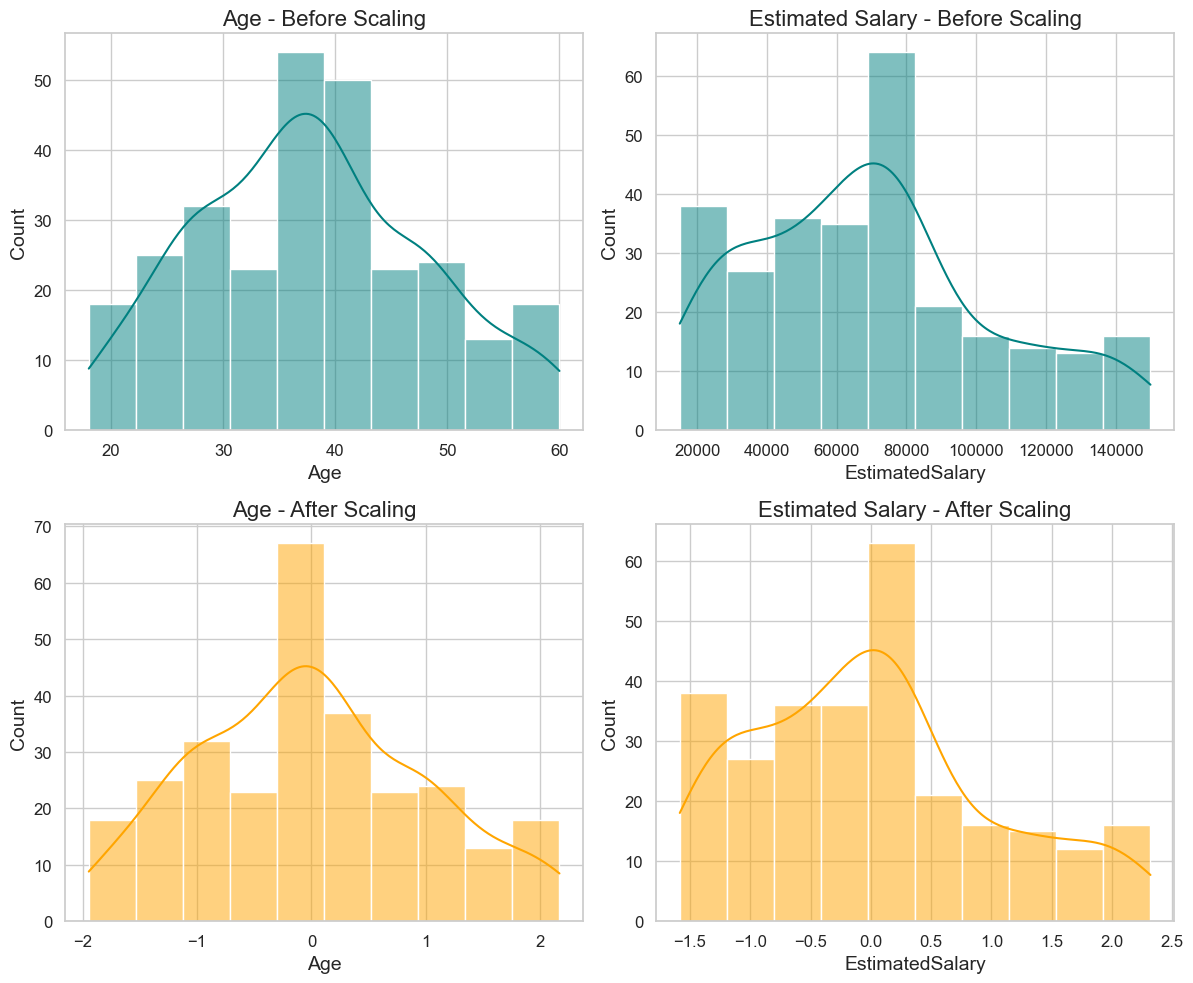

In [31]:
# Create histograms for each feature before and after scaling
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograms before scaling
sns.histplot(X_train['Age'], kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Age - Before Scaling')

sns.histplot(X_train['EstimatedSalary'], kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Estimated Salary - Before Scaling')

# Histograms after scaling
sns.histplot(X_train_scaled['Age'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Age - After Scaling')

sns.histplot(X_train_scaled['EstimatedSalary'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Estimated Salary - After Scaling')

plt.tight_layout()
plt.show()

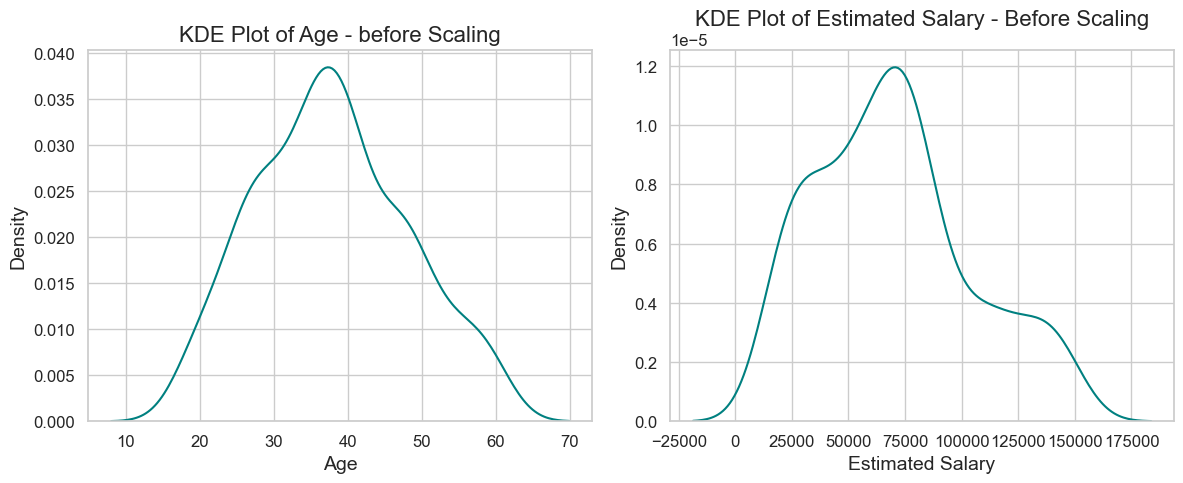

In [35]:
# Create KDE plots for the scaled data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# KDE plot for scaled 'Age'
sns.kdeplot(X_train['Age'], ax=ax1, color='teal')
ax1.set_title('KDE Plot of Age - before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

# KDE plot for scaled 'EstimatedSalary'
sns.kdeplot(X_train['EstimatedSalary'], ax=ax2, color='teal')
ax2.set_title('KDE Plot of Estimated Salary - Before Scaling')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

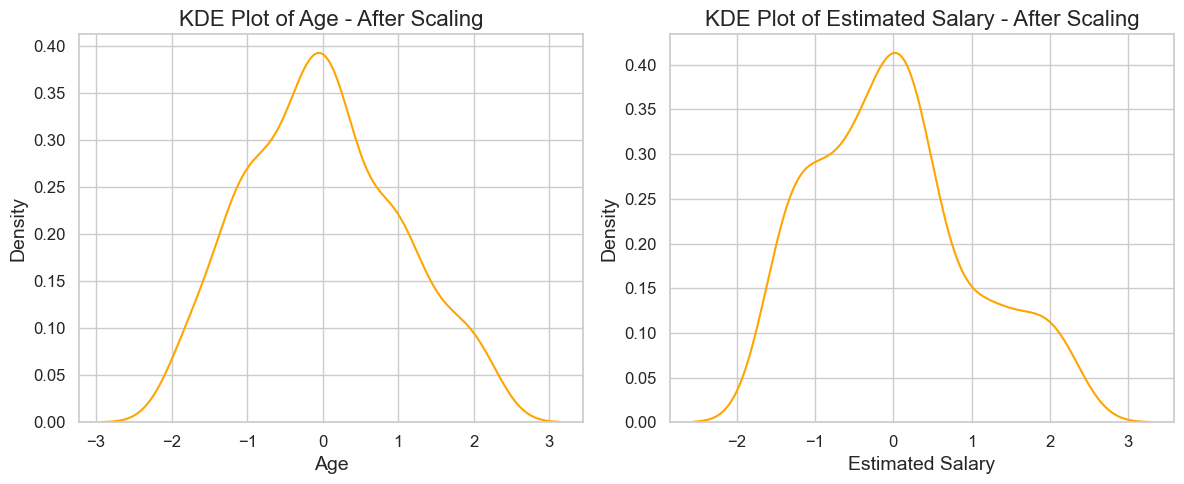

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# KDE plot for scaled 'Age'
sns.kdeplot(X_train_scaled['Age'], ax=ax1, color='orange')
ax1.set_title('KDE Plot of Age - After Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

# KDE plot for scaled 'EstimatedSalary'
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='orange')
ax2.set_title('KDE Plot of Estimated Salary - After Scaling')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

## comparison indivisualy

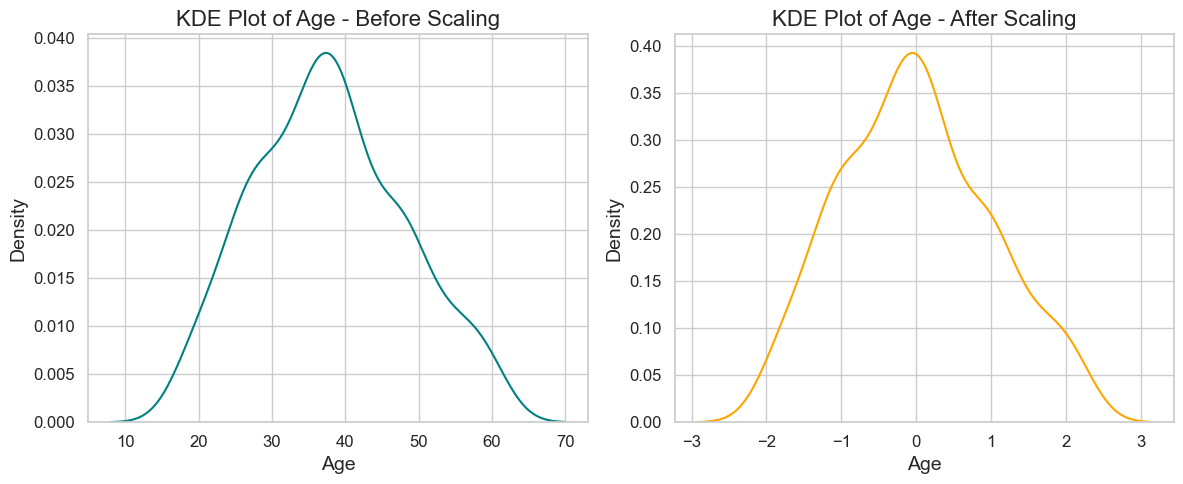

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# KDE plot for scaled 'Age'
sns.kdeplot(X_train['Age'], ax=ax1, color='teal')
ax1.set_title('KDE Plot of Age - Before Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')

# KDE plot for scaled 'Age'
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='orange')
ax2.set_title('KDE Plot of Age - After Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

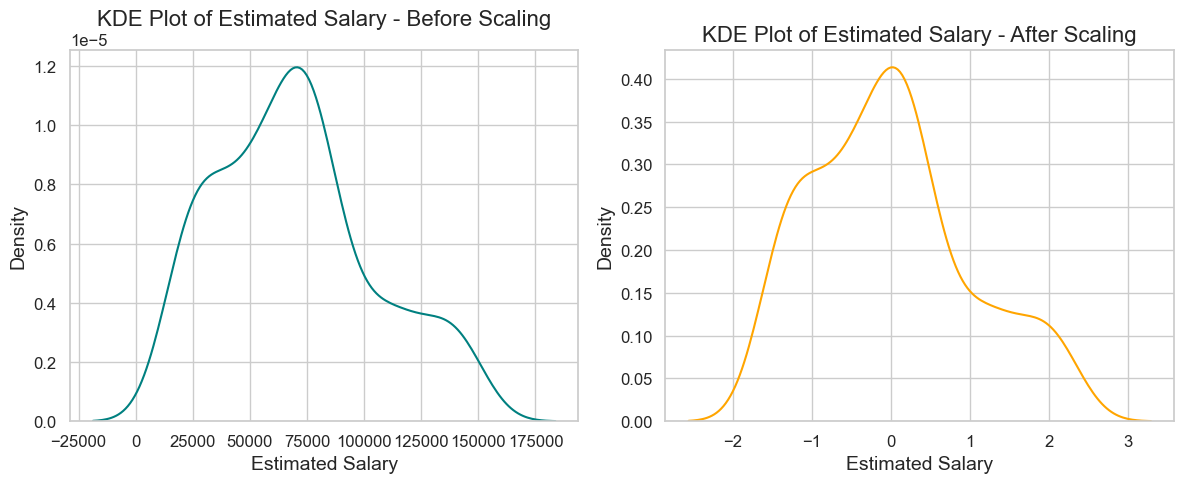

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# KDE plot for scaled 'EstimatedSalary'
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1, color='teal')
ax1.set_title('KDE Plot of Estimated Salary - Before Scaling')
ax1.set_xlabel('Estimated Salary')
ax1.set_ylabel('Density')

# KDE plot for scaled 'EstimatedSalary'
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='orange')
ax2.set_title('KDE Plot of Estimated Salary - After Scaling')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()